In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

df.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# removing un-necessay col (id): 
df = df.iloc[:,1:]

df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# converting the label col into neumerical col : 

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Species'] = encoder.fit_transform(df['Species'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# for understanding bagging , making this dataset into a binary class classification problem :

df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


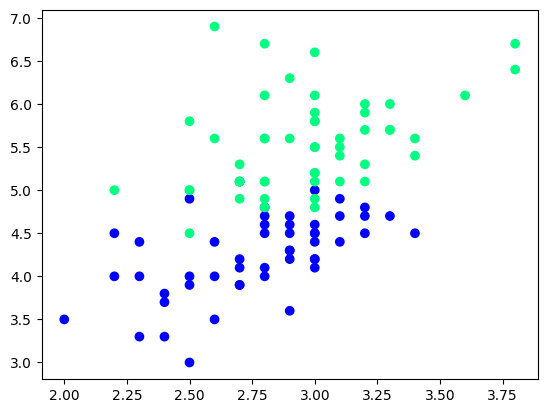

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [8]:
df.shape

(100, 3)

In [9]:
# Randomly selecting 100 rows from the dataset
df = df.sample(100)

# Selecting only 10 rows for training from the first 60 rows
df_train = df.iloc[:60, :].sample(10)

# Selecting only 5 rows for validation from rows 60 to 80
df_val = df.iloc[60:80, :].sample(5)

# Selecting only 5 rows for testing from rows 80 to 100
df_test = df.iloc[80:, :].sample(5)



### **Explanation**
1. **`df = df.sample(100)`**
   - Randomly selects **100 rows** from the original dataset.
   - Ensures that the selected subset is diverse and representative of the original dataset.
  
2. **`df_train = df.iloc[:60, :].sample(10)`**
   - **Takes the first 60 rows** (`df.iloc[:60, :]`).
   - Randomly selects **10 rows** from these 60 rows for **training**.
   - Ensures that the training set is small but representative.

3. **`df_val = df.iloc[60:80, :].sample(5)`**
   - **Takes rows 60 to 80** (`df.iloc[60:80, :]`).
   - Randomly selects **5 rows** for **validation**.
   - The validation set helps fine-tune hyperparameters and avoid overfitting.

4. **`df_test = df.iloc[80:, :].sample(5)`**
   - **Takes rows 80 to 100** (`df.iloc[80:, :]`).
   - Randomly selects **5 rows** for **testing**.
   - The test set evaluates the final model’s performance on unseen data.

---

### **Purpose**
- **Creating a small, manageable dataset** for model training, validation, and testing.
- Ensures **proper data partitioning**:
  - **Training Set (10 rows)** → Used to train the model.
  - **Validation Set (5 rows)** → Used for hyperparameter tuning and model selection.
  - **Test Set (5 rows)** → Used to evaluate the final performance of the model.

---

### **Significance**
- **Reduces computation cost** by working with a small sample instead of the full dataset.
- **Random sampling ensures diversity**, reducing bias in the training, validation, and test sets.
- **Validation set helps prevent overfitting**, ensuring the model generalizes well to new data.
- **Test set provides an unbiased evaluation**, giving a realistic measure of model performance.



In [10]:
df_train

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
71,2.8,4.0,1
114,2.8,5.1,2
112,3.0,5.5,2
111,2.7,5.3,2
118,2.6,6.9,2
134,2.6,5.6,2
65,3.1,4.4,1
59,2.7,3.9,1
142,2.7,5.1,2


In [11]:
df_test

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
81,2.4,3.7,1
78,2.9,4.5,1
82,2.7,3.9,1
99,2.8,4.1,1


In [12]:
df_val

,SepalWidthCm,PetalLengthCm,Species
104,3.0,5.8,2
147,3.0,5.2,2
129,3.0,5.8,2
107,2.9,6.3,2
137,3.1,5.5,2


In [13]:
# Extracting the first two columns (features) from the validation dataset and converting them to a NumPy array
X_test = df_val.iloc[:, 0:2].values  

# Extracting the last column (target variable) from the validation dataset and converting it to a NumPy array
y_test = df_val.iloc[:, -1].values  



### **Explanation**
1. **`X_test = df_val.iloc[:, 0:2].values`**
   - **`df_val.iloc[:, 0:2]`** → Selects the **first two columns** (assumed to be feature variables).
   - **`.values`** → Converts the selected DataFrame slice into a **NumPy array** for compatibility with machine learning models.
   - **Purpose** → Extracts the **input features** from the validation dataset.

2. **`y_test = df_val.iloc[:, -1].values`**
   - **`df_val.iloc[:, -1]`** → Selects the **last column** (assumed to be the target variable).
   - **`.values`** → Converts it into a **NumPy array**.
   - **Purpose** → Extracts the **target labels** from the validation dataset.

---

### **Purpose**
- **Prepares input features (`X_test`) and target labels (`y_test`)** from the validation dataset.
- Converts the **DataFrame subset into NumPy arrays** to ensure compatibility with **machine learning models**.
- Used later to **evaluate model performance** on the validation set.

---

### **Significance**
- **NumPy arrays are optimized** for numerical computations, making them efficient for ML models.
- **Ensures correct slicing of features and target** before feeding them into a model.
- The **validation set helps

# Bagging Part : 

In [14]:
# Creating a bootstrap sample from the training dataset (sampling with replacement)
df_bag = df_train.sample(8, replace=True)  

# Selecting the first two columns as feature variables
X = df_bag.iloc[:, 0:2]  

# Selecting the last column as the target variable
y = df_bag.iloc[:, -1]  

# Displaying the bootstrapped dataset
df_bag  


,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
71,2.8,4.0,1
111,2.7,5.3,2
65,3.1,4.4,1
112,3.0,5.5,2
118,2.6,6.9,2
112,3.0,5.5,2
111,2.7,5.3,2



### **Explanation**
1. **`df_bag = df_train.sample(8, replace=True)`**
   - Randomly selects **8 rows** from `df_train`.
   - **`replace=True`** enables **sampling with replacement**, meaning some rows may be selected multiple times.
   - This is a **bootstrap sampling** technique, commonly used in **Bagging (Bootstrap Aggregating)**.

2. **`X = df_bag.iloc[:, 0:2]`**
   - Selects the **first two columns** from `df_bag`, assuming these are the **feature variables**.
   - These features will be used to train a **decision tree** or another machine learning model.

3. **`y = df_bag.iloc[:, -1]`**
   - Selects the **last column** from `df_bag`, assuming it is the **target variable (labels)**.
   - This is the output that the model will try to predict.

4. **`df_bag`**
   - Displays the **bootstrapped dataset**, allowing verification of the selected samples.

---

### **Purpose**
- **Bootstrap Sampling:** Creates multiple variations of the training dataset for **ensemble learning** techniques like Bagging and Random Forest.
- **Feature & Target Separation:** Extracts `X` (features) and `y` (target labels) for training a model.
- **Ensuring Robustness:** By training multiple models on different samples, we reduce overfitting and improve generalization.

---

### **Significance**
- **Fundamental to Random Forest & Bagging:** Bootstrap sampling is used to train **multiple weak learners** and combine them into a strong ensemble model.
- **Prevents Overfitting:** Different subsets of the data prevent the model from memorizing the training set.
- **Improves Model Stability:** By training on different samples, the model generalizes better to unseen data.



In [15]:
# Importing DecisionTreeClassifier to create a decision tree model
from sklearn.tree import DecisionTreeClassifier  

# Importing plot_tree to visualize the decision tree structure
from sklearn.tree import plot_tree  

# Importing plot_decision_regions from mlxtend to visualize decision boundaries
from mlxtend.plotting import plot_decision_regions  

# Importing accuracy_score to evaluate the model’s performance
from sklearn.metrics import accuracy_score  

# Creating an instance of DecisionTreeClassifier
dt_bag1 = DecisionTreeClassifier()  



### **Explanation**
1. **`from sklearn.tree import DecisionTreeClassifier`**
   - Imports the **DecisionTreeClassifier** from Scikit-learn.
   - This classifier will be used to **train a decision tree model** on a dataset.

2. **`from sklearn.tree import plot_tree`**
   - Imports `plot_tree`, which is used to **visualize the structure** of a trained decision tree.
   - Helps in understanding how the tree splits the data at each decision node.

3. **`from mlxtend.plotting import plot_decision_regions`**
   - Imports `plot_decision_regions`, which is used to **visualize the decision boundaries** created by a classifier.
   - Useful for seeing how well the model separates different classes.

4. **`from sklearn.metrics import accuracy_score`**
   - Imports `accuracy_score`, which is used to **evaluate the classifier's performance** by comparing predictions with true labels.
   - Returns a value between **0 and 1**, where **1.0 means perfect classification**.

5. **`dt_bag1 = DecisionTreeClassifier()`**
   - Creates an **instance of a Decision Tree classifier** with default parameters.
   - This classifier will be trained on a dataset to **learn decision rules** for classification.

---

### **Purpose**
- **Train a Decision Tree Model** (`DecisionTreeClassifier`) to classify data.
- **Visualize the Decision Tree** (`plot_tree`) to understand how it splits the data.
- **Plot Decision Boundaries** (`plot_decision_regions`) to see how the model classifies different regions.
- **Evaluate Model Accuracy** (`accuracy_score`) to measure its performance.

---

### **Significance**
- **Decision trees are interpretable** and easy to understand.
- **Can handle both numerical and categorical data**.
- **Forms the basis for ensemble models** like **Random Forest** and **Gradient Boosting**.
- **Useful for feature importance analysis** since it helps identify key variables in classification.



In [16]:
def evaluate(clf, X, y):  
    # Train the classifier on the given dataset (X: features, y: labels)
    clf.fit(X, y)  
    
    # Plot the decision tree structure to visualize the learned rules
    plot_tree(clf)  
    plt.show()  # Display the tree plot
    
    # Plot decision regions to visualize how the classifier separates different classes
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)  
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)  
    
    # Compute and print the accuracy of the model by comparing predicted labels with actual labels
    print(accuracy_score(y_test, y_pred))  

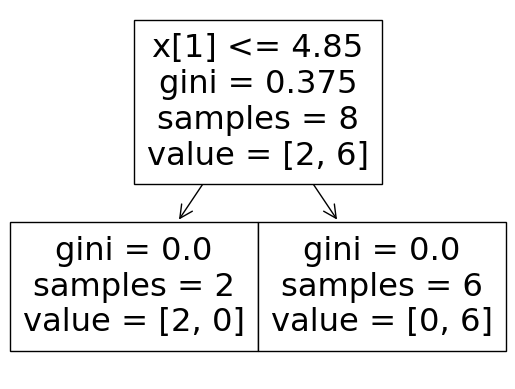

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


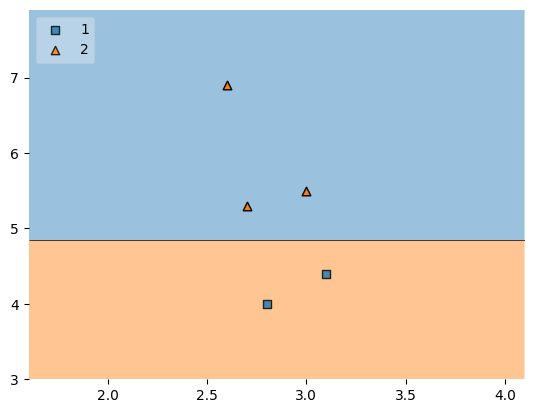

In [17]:
evaluate(dt_bag1,X,y)



### **Understanding the Decision Tree Output**  

1. **Root Node (`x[1] <= 4.9`)**  
   - The decision tree starts by checking **feature `x[1]` (the second feature of `X`)**.
   - If `x[1] <= 4.9`, the instance goes to the **left child node**.
   - Otherwise, it goes to the **right child node**.

2. **Gini Index (`gini = 0.5`)**  
   - Gini index measures **impurity** (how mixed the classes are).  
   - A **value of 0.5** means the dataset is **evenly split between two classes (4 of each class)**, indicating maximum impurity.  

3. **Samples (`samples = 8`)**  
   - This node contains **8 training examples**.  

4. **Value (`value = [4,4]`)**  
   - There are **4 samples from Class 0** and **4 from Class 1**, meaning the split is perfectly balanced.

---

### **Child Nodes (Left and Right)**
- The **left child node** (if `x[1] <= 4.9` is true):
  - **Gini index = 0.0** (perfect purity, only one class exists).
  - **Samples = 4** (all belong to Class 0).
  - **Value = [4,0]** → **4 samples of Class 0, 0 samples of Class 1**.

- The **right child node** (if `x[1] > 4.9` is true):
  - **Gini index = 0.0** (perfect purity, only one class exists).
  - **Samples = 4** (all belong to Class 1).
  - **Value = [0,4]** → **0 samples of Class 0, 4 samples of Class 1**.

---




In [18]:
# Step 1: Create a bootstrap sample of 8 rows from df_train (with replacement)
df_bag = df_train.sample(8, replace=True)  

# Step 2: Extract the first two columns as features (X)
X = df_bag.iloc[:, 0:2]  

# Step 3: Extract the last column as the target variable (y)
y = df_bag.iloc[:, -1]  

# Step 4: Display the sampled dataset
df_bag  


,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
71,2.8,4.0,1
118,2.6,6.9,2
112,3.0,5.5,2
134,2.6,5.6,2
65,3.1,4.4,1
118,2.6,6.9,2
71,2.8,4.0,1



### **Purpose**
- This code **creates a bootstrapped dataset** (random sample with replacement) from `df_train` to train **one** decision tree in an ensemble model.
- The dataset contains **8 rows** randomly selected from `df_train`, meaning some rows may appear **multiple times** (since `replace=True`).
- The features (`X`) include the **first two columns**, while the labels (`y`) are taken from the **last column**.

---

### **Significance**
- **Bootstrap Sampling**: Helps train diverse decision trees by providing **slightly different datasets** for each tree.
- **Bagging (Bootstrap Aggregation)**: This technique is used in **Random Forests** to improve generalization and reduce overfitting.
- **Reducing Overfitting**: By training multiple weak models (trees) on different subsets of data, ensemble methods create a **more robust and generalized model**.



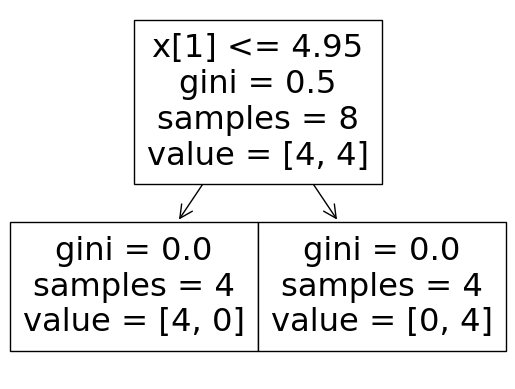

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


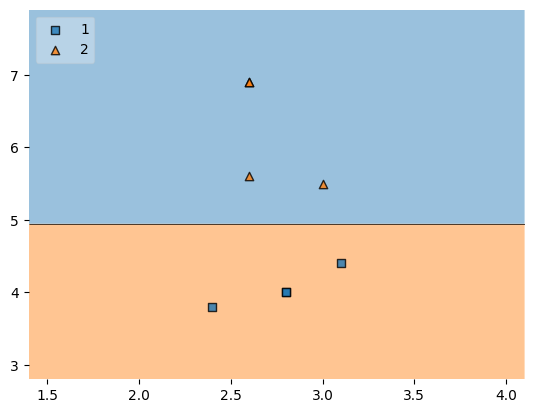

In [19]:
# Creating a second Decision Tree classifier instance
dt_bag2 = DecisionTreeClassifier()  

# Evaluating the Decision Tree on the bootstrapped dataset (X, y)
evaluate(dt_bag2, X, y)  




### **Explanation**
1. **`dt_bag2 = DecisionTreeClassifier()`**
   - Creates a new instance of **DecisionTreeClassifier** with **default parameters**.
   - This classifier will be trained on the **bootstrapped dataset**.

2. **`evaluate(dt_bag2, X, y)`**
   - Calls the `evaluate()` function to:
     1. **Train** the classifier (`dt_bag2`) on features (`X`) and labels (`y`).
     2. **Visualize the Decision Tree** structure using `plot_tree`.
     3. **Display decision boundaries** using `plot_decision_regions`.
     4. **Compute and print the accuracy** on a predefined test set (`X_test` and `y_test`).

---

### **Purpose**
- **Train and evaluate** a new decision tree (`dt_bag2`) on the **bootstrapped sample**.
- **Visualize the tree** to understand its decision-making process.
- **Assess the accuracy** to gauge the model's performance.

---

### **Significance**
- **Bootstrapping** provides a **variety of training samples**, leading to diverse decision trees in ensemble methods like **Bagging** and **Random Forest**.
- **Visualization** helps in **interpreting** how the decision tree splits data.
- **Evaluating multiple trees** with different samples leads to a more **robust and generalized model** when combined.

---

### **Expected Output**
- **Decision Tree Plot**: Shows how `dt_bag2` splits the data.
- **Decision Boundary Plot**: Illustrates how `dt_bag2` classifies different regions in the feature space.
- **Accuracy Score**: Provides a quantitative measure of the classifier’s performance on the test set.



In [20]:
# Step 1: Create a bootstrap sample of 8 rows from df_train (with replacement)
df_bag = df_train.sample(8, replace=True)  

# Step 2: Extract the first two columns as features (X)
X = df_bag.iloc[:, 0:2]  

# Step 3: Extract the last column as the target variable (y)
y = df_bag.iloc[:, -1]  

# Step 4: Display the sampled dataset
df_bag  

,SepalWidthCm,PetalLengthCm,Species
71,2.8,4.0,1
134,2.6,5.6,2
59,2.7,3.9,1
118,2.6,6.9,2
114,2.8,5.1,2
114,2.8,5.1,2
114,2.8,5.1,2
134,2.6,5.6,2


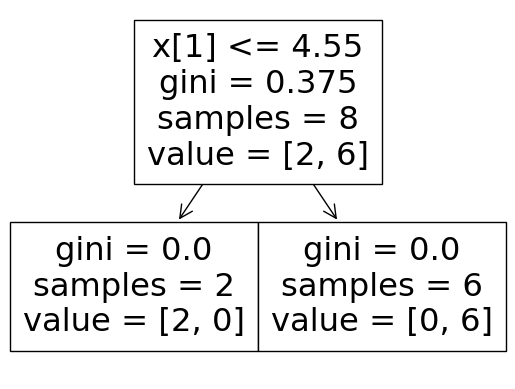

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


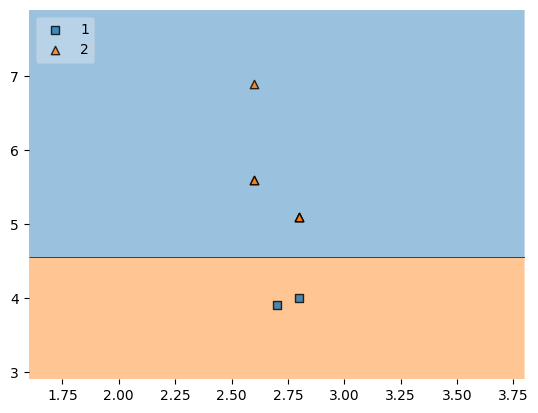

In [21]:
# Creating a third Decision Tree classifier instance
dt_bag3 = DecisionTreeClassifier()  

# Evaluating the Decision Tree on the bootstrapped dataset (X, y)
evaluate(dt_bag3, X, y)  

# Aggregraton / Prediction Part : 

In [22]:
df_test

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
81,2.4,3.7,1
78,2.9,4.5,1
82,2.7,3.9,1
99,2.8,4.1,1


In [28]:
# Making predictions using three different Decision Tree models
print("Predictor 1", dt_bag1.predict(np.array([2.8, 4.1]).reshape(1, 2)))
print("Predictor 2", dt_bag2.predict(np.array([2.8, 4.1]).reshape(1, 2)))
print("Predictor 3", dt_bag3.predict(np.array([2.8, 4.1]).reshape(1, 2)))


Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(




### **Explanation of the Code**
1. **`np.array([2.8, 4.1])`**  
   - Creates a **NumPy array** with feature values `[2.8, 4.1]`, representing a single test sample.

2. **`.reshape(1, 2)`**  
   - Reshapes the array into **2D format**, required by the `predict()` function.
   - `1` → Number of samples, `2` → Number of features.

3. **`dt_bag1.predict(...)`**  
   - Uses the first Decision Tree (`dt_bag1`) to predict the class label for `[2.8, 4.1]`.

4. **`dt_bag2.predict(...)` and `dt_bag3.predict(...)`**  
   - Similarly, the second (`dt_bag2`) and third (`dt_bag3`) Decision Trees predict the class label for the same input.

5. **`print(...)`**  
   - Displays the predicted class labels from all three models.

---

### **Purpose**
- To **compare the predictions of multiple Decision Tree models** trained on different bootstrapped datasets.
- Helps observe **model variance** when different subsets of data are used for training.

### **Significance**
- Since **each tree is trained on different subsets**, their predictions may vary.
- Demonstrates the concept of **Bagging (Bootstrap Aggregation)**.
- In **ensemble learning**, individual predictions can be combined (e.g., through majority voting) to **improve accuracy and reduce overfitting**.

